# 1.4.3 Geometric Transformations of Images
### cv2.getPerspectiveTransform
##### Transformations

In [1]:
# Scaling(크기변경 - 상대크기)

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('cat.jpg')

# dst = cv2.resize(이미지, 이미지의 변환할 절대크기, 가로(상대크기), 세로(상대크기), 이미지 보간 방법)
# 이미지를 절대크기로 변환하려면 dsize=(640, 480) 이런식의 튜플로 입력하고 상대크기의 가로/세로는 입력하지 않아도 된다.
# 이미지를 상대크기로 변화하려면 dsize(0, 0), None 등으로 입력하고 상대크기를 입력한다.
# 많이 사용되는 이미지 보간법은 사이즈를 줄일 때 cv2.INTER_AREA, 사이즈를 크게할 때는 cv2.INTER_CUBIC 혹은 cv2.INTER_LINEAR 을 사용한다.

# 이 경우는 상대크기로 가로/세로를 두 배씩 늘이는 것이다.
res1 = cv2.resize(img, None, fx = 2, fy = 2, interpolation = cv2.INTER_CUBIC)

cv2.imshow('img', img)
cv2.imshow('result', res1)

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [3]:
# OR(크기변경의 다른방법 - 절대크기)

height, width = img.shape[:2] # img.shape에는 세로/가로/채널 정보가 튜플로 저장되어있음.

# 이 경우는 절대크기로 가로/세로를 두 배씩 늘이는 것이다.
res2 = cv2.resize(img, (2 * width, 2 * height), interpolation = cv2.INTER_CUBIC)

cv2.imshow('img', img)
cv2.imshow('result', res2)

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [4]:
# Translation(위치변경)

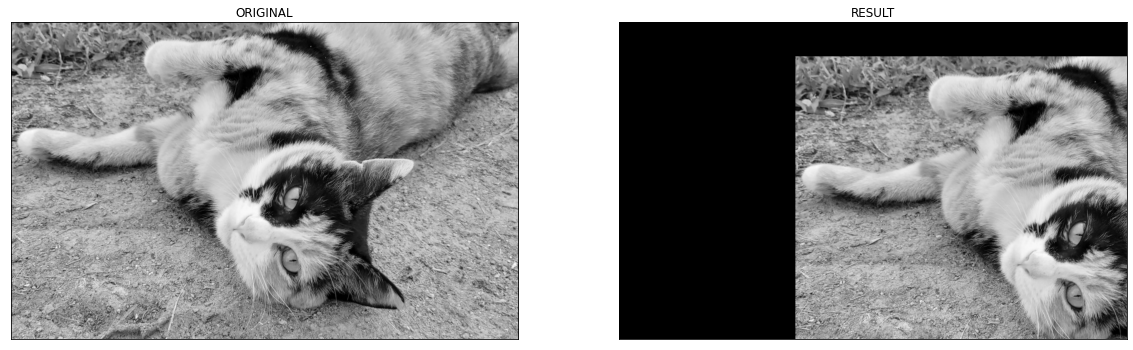

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('cat.jpg', 0)
rows, cols = img.shape

# X축, Y축으로 이동하는(왼쪽 위 0, 0 기준) 변환행렬
# [[1,0,x축이동],[0,1,y축이동]]
M = np.float32([[1, 0, 500],[0, 1, 100]])

# cv2.warpAffine(이미지, 변환 행렬, (width=columns, height=rows))
dst = cv2.warpAffine(img, M, (cols, rows))

# matplotlib로 볼 때 이미지의 사이즈를 변경하는 것
plt.rcParams["figure.figsize"] = (20, 10)

# plt.subplot(231) --> 2x3 행렬로 정렬된 표에서 1번째(왼쪽 위부터)
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('ORIGINAL'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)), plt.title('RESULT'), plt.xticks([]), plt.yticks([])

plt.show()

In [6]:
# Rotation(각도변경)

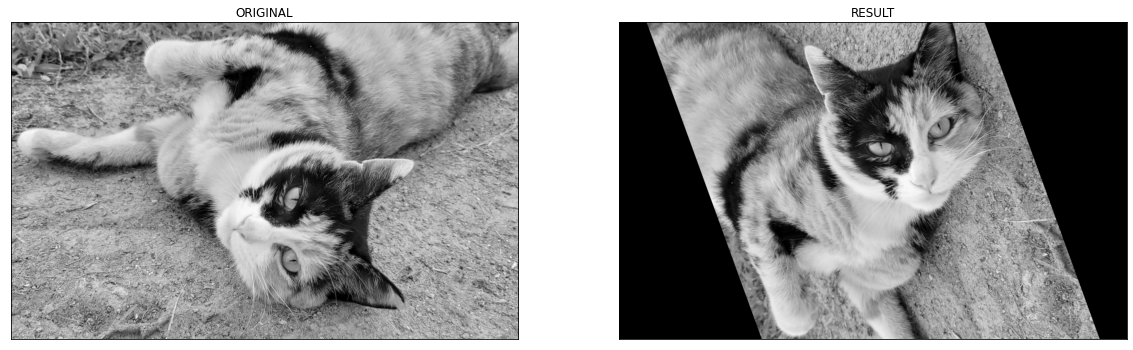

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('cat.jpg', 0)
rows, cols = img.shape

# cv2.getRotationMatrix2D(중심점(튜플), 회전 각도, 비율(확대 및 축소 비율))
# 이미지의 각도를 변환시키는 변환행렬
M = cv2.getRotationMatrix2D((cols / 2,rows / 2), 110, 1)

# cv2.warpAffine(이미지, 변환 행렬, (width=columns, height=rows))
dst = cv2.warpAffine(img,M,(cols,rows))

# matplotlib로 볼 때 이미지의 사이즈를 변경하는 것
plt.rcParams["figure.figsize"] = (20, 10)

# plt.subplot(231) --> 2x3 행렬로 정렬된 표에서 1번째(왼쪽 위부터)
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('ORIGINAL'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)), plt.title('RESULT'), plt.xticks([]), plt.yticks([])

plt.show()

In [8]:
# Affine Transformation

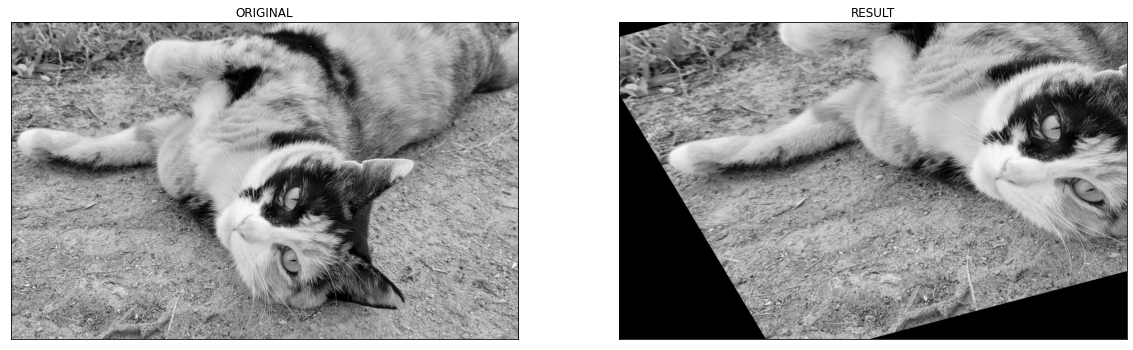

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('cat.jpg', 0)
rows, cols = img.shape

pts1 = np.float32([[50,50], [200,50], [50,200]])
pts2 = np.float32([[10,100], [200,50], [100,250]])

# cv2.getAffineTransform(변환 전 픽셀 좌표, 변환 후 픽셀 좌표) -> 픽셀 좌표는 3개 필요하다
# 선의 평행성은 유지가 되면서 이미지를 변환하는 작업. 이동, 확대, Scale, 반전까지 포함된 변환
M = cv2.getAffineTransform(pts1, pts2)

# cv2.warpAffine(이미지, 변환 행렬, (width=columns, height=rows))
dst = cv2.warpAffine(img, M, (cols, rows))

# matplotlib로 볼 때 이미지의 사이즈를 변경하는 것
plt.rcParams["figure.figsize"] = (20, 10)

# plt.subplot(231) --> 2x3 행렬로 정렬된 표에서 1번째(왼쪽 위부터)
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('ORIGINAL'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)), plt.title('RESULT'), plt.xticks([]), plt.yticks([])

plt.show()

In [10]:
# Perspective Transformation(투시 변환)

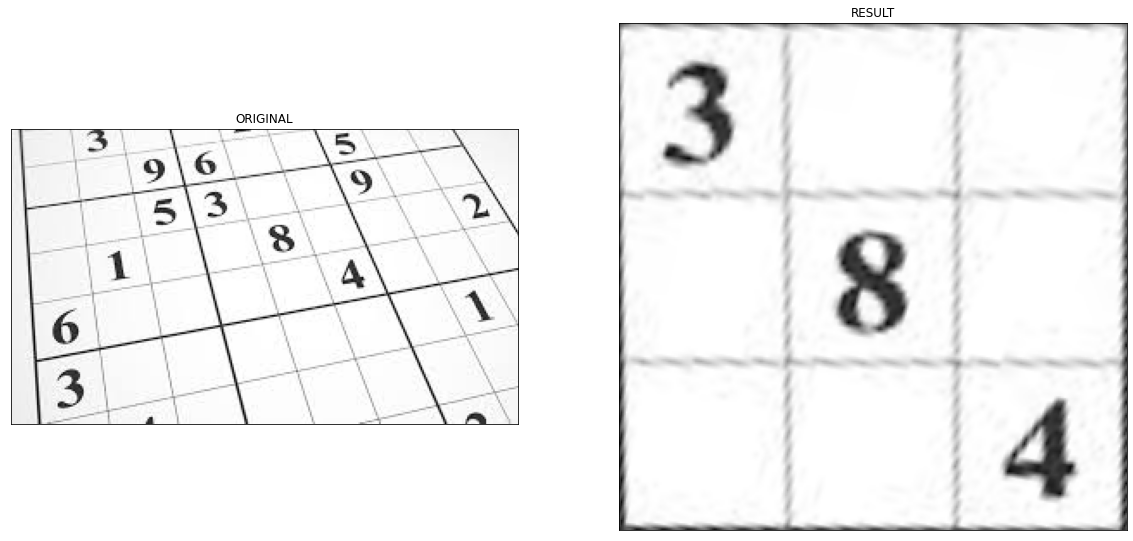

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sudoku.jpg', 0)
rows, cols = img.shape

pts1 = np.float32([[101, 33],[184, 21],[121, 114], [218, 95]])
pts2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])

# cv2.getPerspectiveTransform(변환 전 픽셀 좌표, 변환 후 픽셀 좌표) -> 픽셀 좌표는 4개 필요하다.
M = cv2.getPerspectiveTransform(pts1,pts2)

# cv2.warpPerspective(이미지, 맵 행렬, 출력 이미지 크기(튜플))는 입력 이미지(src)에 원근 맵 행렬(M)을 적용하고, 출력 이미지 크기(dsize)로 변형해서 출력 이미지(dst)를 반환합니다.
dst = cv2.warpPerspective(img, M, (300, 300))

# matplotlib로 볼 때 이미지의 사이즈를 변경하는 것
plt.rcParams["figure.figsize"] = (20, 10)

# plt.subplot(231) --> 2x3 행렬로 정렬된 표에서 1번째(왼쪽 위부터)
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('ORIGINAL'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)), plt.title('RESULT'), plt.xticks([]), plt.yticks([])

plt.show()